In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
matplotlib.rc('font',family = 'Malgun Gothic')
matplotlib.rc('axes',unicode_minus = False)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font", family = "Malgun Gothic")
matplotlib.rc("axes",unicode_minus = False)

In [3]:
df1 = pd.read_csv('bank.csv')

In [5]:
df1  # 정제 방안 / 분석 계획 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


In [21]:
df1.isnull().sum()  # 결측치 384개 약 11%  - 데이터가 편향될거 같다 ( 원본데이터가 비율이 얼마 차이가 나지않아서 ) 
#- 결측치를 제거하더라도 전체데이터를 해치지않는다고 판단 / 결측치의 비율이 10퍼로 적고 

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

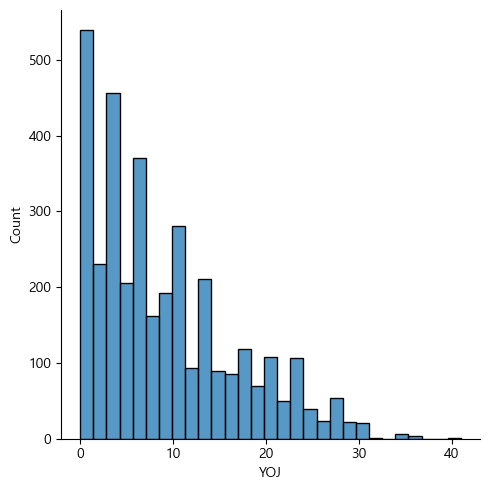

In [15]:
sns.displot(df1['YOJ'])

In [18]:
df1['YOJ'].value_counts()

YOJ
0.0     307
4.0     241
1.0     232
2.0     230
3.0     216
6.0     207
5.0     206
9.0     193
10.0    167
7.0     163
8.0     162
13.0    117
11.0    114
14.0     94
12.0     94
15.0     89
16.0     85
19.0     70
17.0     64
23.0     56
18.0     55
21.0     54
20.0     54
24.0     51
22.0     50
25.0     39
27.0     29
28.0     25
26.0     24
29.0     22
30.0     16
31.0      5
35.0      5
36.0      4
41.0      1
34.0      1
32.0      1
Name: count, dtype: int64

In [22]:
df1['JOB'].value_counts()

JOB
Other      1444
ProfExe     929
Office      623
Mgr         477
Self        130
Sales        64
Name: count, dtype: int64

In [27]:
df1['YOJ'].isnull().dropna()

0       False
1       False
2       False
3       False
4       False
        ...  
3743    False
3744    False
3745    False
3746    False
3747    False
Name: YOJ, Length: 3748, dtype: bool

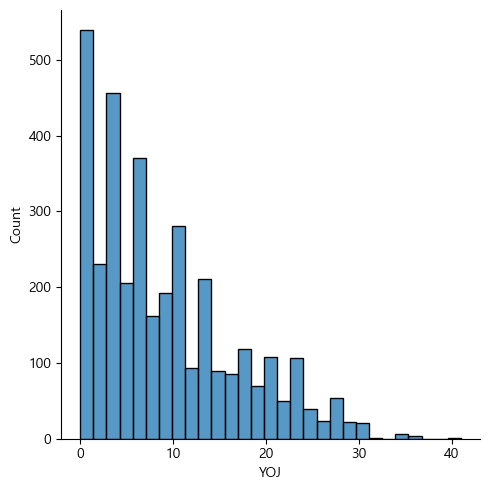

In [32]:
sns.displot(df1['YOJ'])

In [35]:
df1[df1.isnull().any(axis=1)]['YOJ'].value_counts()

YOJ
4.0     20
3.0     19
2.0     16
6.0     11
5.0     11
0.0     11
14.0    10
28.0     8
1.0      7
7.0      7
8.0      7
19.0     6
25.0     6
16.0     6
13.0     5
17.0     5
26.0     4
27.0     3
18.0     3
10.0     3
9.0      3
15.0     2
11.0     2
21.0     2
12.0     1
24.0     1
Name: count, dtype: int64

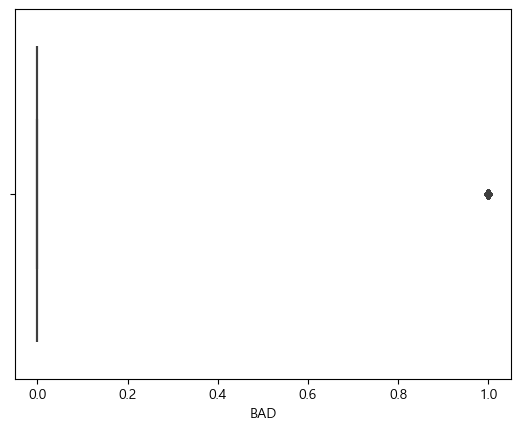

In [43]:
sns.boxplot(x= "BAD",data = df1)
plt.show()  # 이상치값은 제거하지않음 

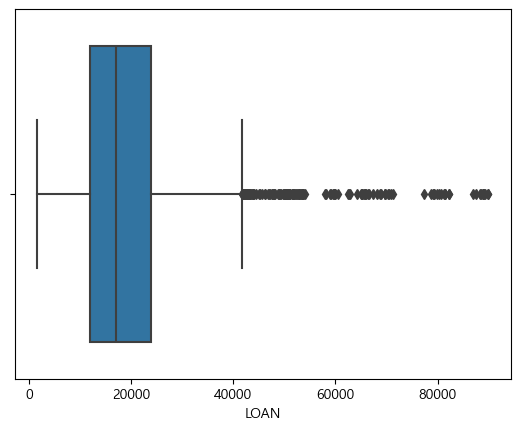

In [46]:
sns.boxplot(x= "LOAN",data = df1)
plt.show()  # 이상치값은 제거하지않음  # 모기지 = 주택 살려고 대출받은 금액

In [73]:
df1[df1['LOAN'] > 35000]  # 이유 : 이상치를 버림 신용도에 영향이 없을거같다 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3468,0,35100,33844,55100.0,DebtCon,Other,NaN,0,0.0,NaN,6.0,0,34.703024
3469,0,35100,88197,132776.0,DebtCon,Mgr,30.0,0,0.0,333.046312,0.0,20,39.294721
3470,0,35200,239513,37076.0,DebtCon,Mgr,0.0,0,1.0,183.373452,2.0,49,40.779849
3471,0,35200,234682,37079.0,DebtCon,Mgr,2.0,0,1.0,216.666637,2.0,50,40.410051
3472,0,35200,239987,43028.0,DebtCon,Mgr,2.0,0,1.0,210.189005,3.0,49,41.336627
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,DebtCon,Other,16.0,0,0.0,221.808718,0.0,16,36.112347
3744,0,89000,54576,92937.0,DebtCon,Other,16.0,0,0.0,208.692070,0.0,15,35.859971
3745,0,89200,54045,92924.0,DebtCon,Other,15.0,0,0.0,212.279697,0.0,15,35.556590
3746,0,89800,50370,91861.0,DebtCon,Other,14.0,0,0.0,213.892709,0.0,16,34.340882


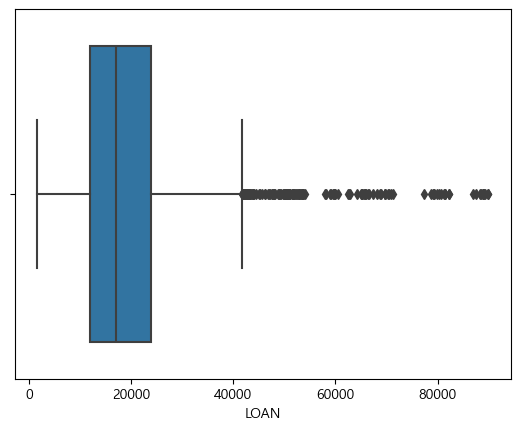

In [50]:
sns.boxplot(x= "LOAN",data = df1)
plt.show()  # 이상치값은 제거하지않음  # 모기지 = 주택 살려고 대출받은 금액|

In [53]:
df1 = df1.drop(df1[df1['MORTDUE'] > 350000].index)

In [ ]:
# df1

In [71]:
df = df1.dropna()
df = df.drop(df1[df1['MORTDUE'] > 350000].index)

In [72]:
sns.boxplot(x= "CLEAGE",data = df1)

ValueError: Could not interpret input 'CLEAGE'